In [1]:
# Imports
import matplotlib.pyplot as plt
import maze_dataset as md
import maze_generator.maze_dataset as md
import numpy as np
import DQN.training as trainer
import DQN.agent as agent
import DQN.models as models
import os
print(os.getcwd())

/home/cody/Documents/DataSciBC/Generative_AI/maze_game


In [2]:
dataset = md.Maze_dataset(1,(3,3),maze_type = 'percolation')

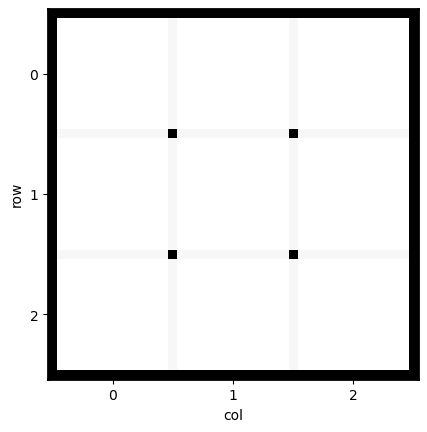

In [3]:
dataset.show_maze(0)

In [4]:
init_pos = {'agents': [0],
            'targets': [8]
                        }
# --- maze agent with the type of model --- #
maze_agent = agent.maze_agents(models.CNN_version1,
                               vision=3,
                               action_type='cardinal')
# --- trainer of the agent --- #
train = trainer.Maze_Training(name = 'test17',
                              maze_dataset = dataset,
                              maze_agent = maze_agent,
                              len_game=100,
                              n_agents=1,
                              gamma = 0.99,
                              tau = 0.001,
                              batch_size = 64,
                              n_frames = 500000,
                              lr = 0.000025,
                              replay_buffer_size=10000,
                              target_update=10000,
                              policy_update=1,
                              lambda_entropy=0.4,
                              beta = 1,
                              alpha = 0.6,
                              per = True
                              )
train.train()
train.save()

/home/cody/miniconda3/envs/GameRFL/lib/python3.12/site-packages/gymnasium/utils/passive_env_checker.py:245: UserWarning: WARN: The reward returned by `step()` must be a float, int, np.integer or np.floating, actual type: <class 'numpy.ndarray'>
  logger.warn(


Max Q-value: 1.4169373512268066, Max Target Values 85.07460021972656, minus: 84.81375122070312
Max Entropy: 1.3822615146636963, Min Entropy: 1.2996927499771118
frame 10000 with loss 36.67300033569336
Max Q-value: 1.0027157068252563, Max Target Values 85.2141342163086, minus: 85.18962097167969
Max Entropy: 1.3804188966751099, Min Entropy: 1.3344697952270508
frame 20000 with loss 49.29716873168945
Max Q-value: 0.9787884950637817, Max Target Values 85.35346984863281, minus: 84.92212677001953
Max Entropy: 1.3803203105926514, Min Entropy: 1.3351861238479614
frame 30000 with loss 53.906005859375
Max Q-value: 0.9895461201667786, Max Target Values 82.2344741821289, minus: 81.65272521972656
Max Entropy: 1.380885362625122, Min Entropy: 1.3343110084533691
frame 40000 with loss 51.94879913330078
Max Q-value: 0.9787894487380981, Max Target Values 86.03152465820312, minus: 85.62547302246094
Max Entropy: 1.3803668022155762, Min Entropy: 1.3351858854293823
frame 50000 with loss 51.1592903137207
Max Q-

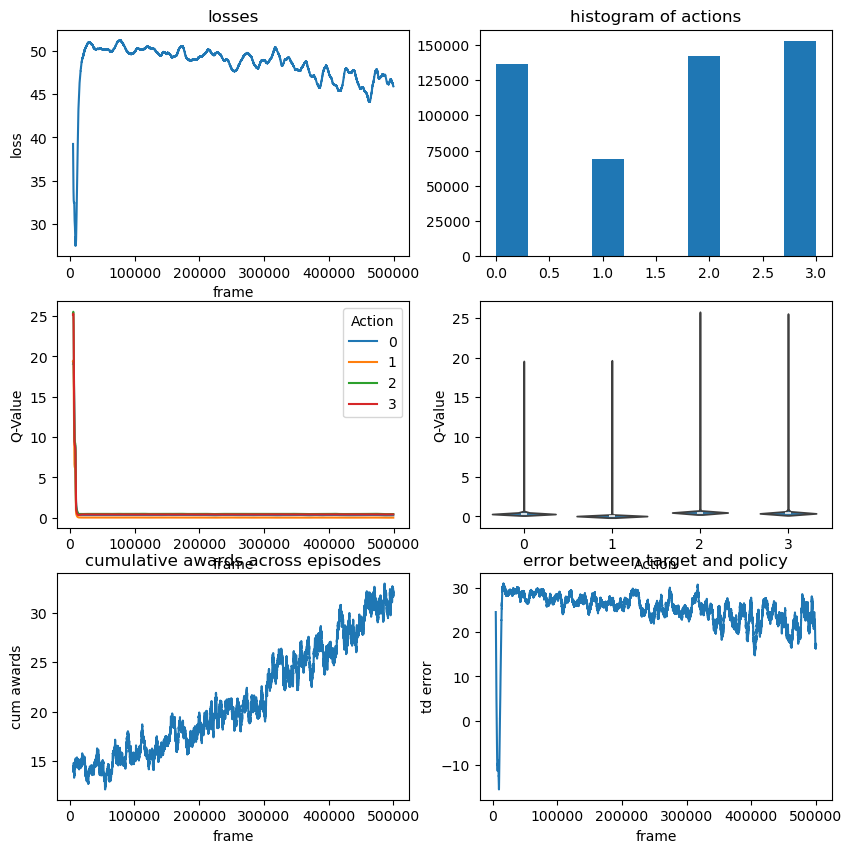

In [5]:
train.results()

In [12]:
init_pos = {'agents': [0],
            'targets': [8]
                        }
train.agents.run_agent(dataset[0],num_agents=1,len_game=50,epsilon=0,sample_prob=False,agents_pos=[0],targets_pos=None)


cumulative reward: [49.005]


In [7]:
import DQN.agent as agent

load = agent.maze_agents.load('test14')

/home/cody/Documents/DataSciBC/Generative_AI/maze_game/DQN/agent.py:77: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  return result


In [8]:
init_pos = {'agents': [0],
            'targets': [8]
                        }
testing_dataset = md.Maze_dataset(1,shape=(3,3),maze_type='percolation')

In [9]:
load.run_agent(testing_dataset[0],len_game=50,n_episodes=1,agents_pos = None, targets_pos =None)

cumulative reward: [49.5]
